Lorenz equations as a model of atmospheric convection:


This is one of the classic systems in non-linear differential equations. It exhibits a range of different behaviors as the parameters (σ, β, ρ) are varied.

x˙ = σ(y−x)

y˙ = ρx−y−xz

z˙ = −βz+xy

The Lorenz equations also arise in simplified models for lasers, dynamos, thermosyphons, brushless DC motors, electric circuits, chemical reactions, and forward osmosis.

The Lorenz system is nonlinear, non-periodic, three-dimensional and deterministic.

The Lorenz equations are derived from the Oberbeck-Boussinesq approximation to the equations describing fluid circulation in a shallow layer of fluid, heated uniformly from below and cooled uniformly from above. This fluid circulation is known as Rayleigh-Bénard convection. The fluid is assumed to circulate in two dimensions (vertical and horizontal) with periodic rectangular boundary conditions.

The partial differential equations modeling the system's stream function and temperature are subjected to a spectral Galerkin approximation: the hydrodynamic fields are expanded in Fourier series, which are then severely truncated to a single term for the stream function and two terms for the temperature. This reduces the model equations to a set of three coupled, nonlinear ordinary differential equations.

In [8]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [9]:
#Computing the trajectories and plotting the result.

def solve_lorenz(
    N =10, 
    angle = 0.0, 
    max_time = 4.0, 
    sigma = 10.0, 
    beta = 8./3, 
    rho = 28.0):
    
    '''
    We define a function that can integrate the differential 
    equations numerically and then plot the solutions. 
    This function has arguments that control the parameters of the
    differential equation (σ, β, ρ), 
    the numerical integration (N, max_time),
    and the visualization (angle).
    '''
    
    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection = '3d');
    ax.axis('on')
    
    #Prepare the axes limits.
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(
        x_y_z, 
        t0, 
        sigma = sigma, 
        beta = beta, 
        rho = rho):
        
        '''
        Computes the time-derivate of a Lorenz System.
        '''
        
        x, y, z = x_y_z
        
        return[
            sigma * (y - x), 
            x * (rho - z) - y, 
            x * y - beta * z]
    
    #Choose random starting points, uniformly distributed from -15 to 15.
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))
    
    #Solve for the trajectories. 
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])
    
    #Choose a different color for each trajectory. 
    colors = plt.cm.jet(np.linspace(0, 1, N));
    
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c = colors[i])
        _ = plt.setp(lines, linewidth = 2);
        
    ax.view_init(30, angle)
    _ = plt.show();
    
    return t, x_t

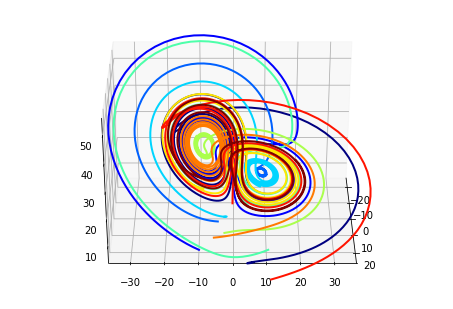

In [10]:
t, x_t = solve_lorenz(angle = 0, N = 10)

In [11]:
w = interactive(
    solve_lorenz, 
    angle = (0., 360.),
    N = (0, 50),
    sigma = (0.0, 50.0),
    rho = (0.0, 50.0),
)
display(w)